Copyright @ cb_park@korea.ac.kr (Cheonbok Park), joonleesky@kaist.ac.kr (Hojoon Lee)

## Convolutional Neural Network

In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torchvision.datasets as datasets
import torchvision.transforms as transforms

## Below are the all identical neural network with different expression

In [2]:
class CNN1(nn.Module):
    def __init__(self): # input image = batch_size x 3 x 32 x 32
        super(CNN1, self).__init__()
        
        self.conv = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(2)

    def forward(self, x):
        out = self.conv(x)
        out = self.relu(out)
        out = self.maxpool(out)
        return out  # input image = batch_size x 3 x 16 x 16

    
class CNN2(nn.Module):
    def __init__(self): # input image = batch_size x 3 x 32 x 32
        super(CNN2, self).__init__()

        self.layer = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2))

    def forward(self, x):
        out = self.layer(x)
        return out  # input image = batch_size x 3 x 16 x 16      
      

class CNN3(nn.Module):
    def __init__(self): # input image = batch_size x 3 x 32 x 32
        super(CNN3, self).__init__()
        layer = []
        
        layer.append(nn.Conv2d(3, 64, kernel_size=3, padding=1))
        layer.append(nn.ReLU())
        layer.append(nn.MaxPool2d(2))
        
        self.layer = nn.Sequential(*layer)

    def forward(self, x):
        out = self.layer(x)
        return out  # input image = batch_size x 3 x 16 x 16

In [3]:
sample_image = Variable(torch.zeros(64, 3, 32, 32))

In [4]:
cnn = CNN1()
print(cnn)
output = cnn(sample_image)
print(output.size())

CNN1(
  (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu): ReLU()
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)
torch.Size([64, 64, 16, 16])


In [5]:
cnn = CNN2()
print(cnn)
output = cnn(sample_image)
print(output.size())

CNN2(
  (layer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
)
torch.Size([64, 64, 16, 16])


In [6]:
cnn = CNN3()
print(cnn)
output = cnn(sample_image)
print(output.size())

CNN3(
  (layer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
)
torch.Size([64, 64, 16, 16])


### Let's practice creating the Convolutional Neural Network

In [7]:
class CNN_prac(nn.Module):
    def __init__(self): # input image = batch_size x 3 x 32 x 32
        super(CNN_prac, self).__init__()
        self.conv1 = nn.Conv2d(3, 512, 3, 1, 1) 
        self.conv2 = nn.Conv2d(512, 256, 3, 1, 1) 
        self.conv3 = nn.Conv2d(256, 256, 3, 2, 1) 
        self.conv4 = nn.Conv2d(256, 256, 5, 4, 1) 

        self.linear = nn.Linear(256*4*4, 10)
    def forward(self, x):
        out=self.conv1(x)
        out=self.conv2(out)
        out=self.conv3(out)
        out=self.conv4(out)
        out = out.contiguous().view(-1, 256*4*4)
        out = self.linear(out)
        return out

In [8]:
cnn_prac=CNN_prac()
sample_image = Variable(torch.zeros(64, 3, 32, 32))
output=cnn_prac(sample_image)
print(output.size()) 
print(cnn_prac)

torch.Size([64, 10])
CNN_prac(
  (conv1): Conv2d(3, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(512, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(256, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv4): Conv2d(256, 256, kernel_size=(5, 5), stride=(4, 4), padding=(1, 1))
  (linear): Linear(in_features=4096, out_features=10, bias=True)
)


## 2.1 VGG-19

### Let's create by yourself

In [9]:
class ConvBlock1(nn.Module):

    def __init__(self, in_dim, out_dim):
        super(ConvBlock1, self).__init__()
        
        self.in_dim = in_dim
        self.out_dim = out_dim
        
        self.main = nn.Sequential(nn.Conv2d(self.in_dim, self.out_dim, kernel_size=3, padding=1),                    
                                  nn.BatchNorm2d(self.out_dim),
                                  nn.ReLU(),
                                  nn.Conv2d(self.out_dim, self.out_dim, kernel_size=3, padding=1),
                                  nn.BatchNorm2d(self.out_dim),
                                  nn.ReLU(),
                                  nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False))
        
    def forward(self, x):
        out = self.main(x)
        return out

In [10]:
class ConvBlock2(nn.Module):

    def __init__(self, in_dim, out_dim):
        super(ConvBlock2, self).__init__()
        
        self.in_dim = in_dim
        self.out_dim = out_dim
        
        self.main = nn.Sequential(nn.Conv2d(self.in_dim, self.out_dim, kernel_size=3, padding=1),                    
                                  nn.BatchNorm2d(self.out_dim),
                                  nn.ReLU(),
                                  nn.Conv2d(self.out_dim, self.out_dim, kernel_size=3, padding=1),
                                  nn.BatchNorm2d(self.out_dim),
                                  nn.ReLU(),
                                  nn.Conv2d(self.out_dim, self.out_dim, kernel_size=3, padding=1),
                                  nn.BatchNorm2d(self.out_dim),
                                  nn.ReLU(),
                                  nn.Conv2d(self.out_dim, self.out_dim, kernel_size=3, padding=1),
                                  nn.BatchNorm2d(self.out_dim),
                                  nn.ReLU(),
                                  nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False))
        
    def forward(self, x):
        out = self.main(x)
        return out

In [11]:
class VGG19(nn.Module):
  
    def __init__(self):
        super(VGG19, self).__init__()
        
        self.convlayer1 = ConvBlock1(3, 64)
        self.convlayer2 = ConvBlock1(64, 128)
        self.convlayer3 = ConvBlock2(128, 256)
        self.convlayer4 = ConvBlock2(256, 512)
        self.convlayer5 = ConvBlock2(512, 512)
        self.linear = nn.Sequential(
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.Linear(128, 10),
        )
    def forward(self, input):
        out = self.convlayer1(input)    
        out = self.convlayer2(out)
        out = self.convlayer3(out)
        out = self.convlayer4(out)
        out = self.convlayer5(out).squeeze() # 16 x 512 x 1 x 1에서 뒤 1 x 1 축약 
        out = self.linear(out)
        return out


## Test Your Impelemetation

In [12]:
vgg19 = VGG19()
print(vgg19)

output = vgg19(sample_image)
print(output.size())

VGG19(
  (convlayer1): ConvBlock1(
    (main): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU()
      (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
  )
  (convlayer2): ConvBlock1(
    (main): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU()
      (6): MaxPool2d(kernel_size=2, stride=2,

In [13]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)
if count_parameters(vgg19) == 20365002:
    print('success!')

success!


# 2.2 CIFAR-10 Dataset

50000 training images  \
10000 validation images \
\
10 classes = [airplane, car, truck, frog, ...]
\
for more info, https://www.cs.toronto.edu/~kriz/cifar.html 



In [14]:
# set hyperparameters
batch_size = 64
learning_rate = 0.0001
num_epochs = 4

In [15]:
# import torchvision.datasets as datasets

train_dataset = datasets.CIFAR10(root='./data/',       # 50000장
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = datasets.CIFAR10(root='./data/',        # 10000장
                           train=False, 
                           transform=transforms.ToTensor())

# 데이터 로더
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size, 
                                          shuffle=True)

0it [00:00, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data/


In [16]:
import matplotlib.pyplot as plt
import numpy as np


def show_cifar10():
    for images, _ in train_loader:
        plt.figure(figsize=(8,8))
        images_to_show = images.numpy().transpose((0,2,3,1))

        for a in range(331, 340):  
            plt.subplot(a)
            plt.imshow(images_to_show[a-331])
            plt.xticks([])
            plt.yticks([])    
            plt.show()   
        break
    return 0


def loss_plot(acc):  
    plt.plot(acc)
    plt.xlabel('log')
    plt.ylabel('accuracy')
    plt.grid(True)
    plt.show()
    return 0

import time
class Timer():    
    def __init__(self):
        self.cur_t = time.time()

    def tic(self):
        self.cur_t = time.time()

    def toc(self):
        return time.time() - self.cur_t

    def tocStr(self, t=-1):
        if (t == -1):
            return str(datetime.timedelta(seconds=np.round(time.time() - self.cur_t, 3)))[:-4]
        else:
            return str(datetime.timedelta(seconds=np.round(t, 3)))[:-4]
          

def test_on_cifar10(model, accuracy_list):  
    # Test the Model       
    model.eval()    # Change model to 'eval' mode (BN uses moving mean/var).
    correct = 0
    total = 0
    for j, (images, labels) in enumerate(test_loader):
        images = Variable(images).cuda()
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted.cpu() == labels).sum()
        if (j+1)%100==0:
            break

    print('Test Accuracy of the model on the 100 test images: %d %%' % (100 * correct.float() / total))
    accuracy_list.append(100 * correct.float() / total)
    return accuracy_list

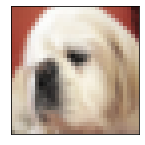

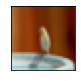

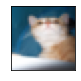

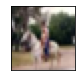

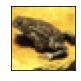

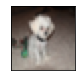

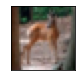

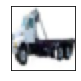

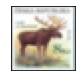

0

In [17]:
show_cifar10()

## Train Cifar-10 with your VGG-19

Epoch [1/4], Iter [100/781] Loss: 2.2081, iter_time: 10.80
Test Accuracy of the model on the 100 test images: 19 %
Epoch [1/4], Iter [200/781] Loss: 1.7419, iter_time: 8.77
Test Accuracy of the model on the 100 test images: 30 %
Epoch [1/4], Iter [300/781] Loss: 1.7088, iter_time: 8.76
Test Accuracy of the model on the 100 test images: 32 %
Epoch [1/4], Iter [400/781] Loss: 1.7312, iter_time: 8.85
Test Accuracy of the model on the 100 test images: 38 %
Epoch [1/4], Iter [500/781] Loss: 1.4609, iter_time: 8.78
Test Accuracy of the model on the 100 test images: 42 %
Epoch [1/4], Iter [600/781] Loss: 1.5884, iter_time: 8.61
Test Accuracy of the model on the 100 test images: 45 %
Epoch [1/4], Iter [700/781] Loss: 1.3387, iter_time: 8.62
Test Accuracy of the model on the 100 test images: 46 %


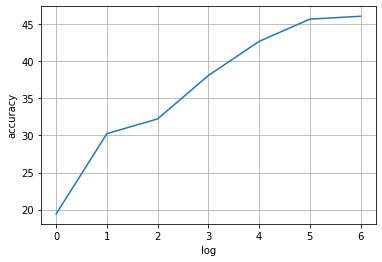

Epoch [2/4], Iter [100/781] Loss: 1.4878, iter_time: 14.13
Test Accuracy of the model on the 100 test images: 49 %
Epoch [2/4], Iter [200/781] Loss: 1.1971, iter_time: 8.60
Test Accuracy of the model on the 100 test images: 51 %
Epoch [2/4], Iter [300/781] Loss: 1.3354, iter_time: 8.61
Test Accuracy of the model on the 100 test images: 55 %
Epoch [2/4], Iter [400/781] Loss: 1.2011, iter_time: 8.62
Test Accuracy of the model on the 100 test images: 55 %
Epoch [2/4], Iter [500/781] Loss: 1.2443, iter_time: 8.61
Test Accuracy of the model on the 100 test images: 55 %
Epoch [2/4], Iter [600/781] Loss: 1.2199, iter_time: 8.64
Test Accuracy of the model on the 100 test images: 54 %
Epoch [2/4], Iter [700/781] Loss: 1.4527, iter_time: 8.64
Test Accuracy of the model on the 100 test images: 57 %


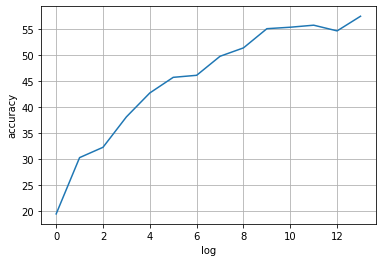

Epoch [3/4], Iter [100/781] Loss: 1.0375, iter_time: 14.02
Test Accuracy of the model on the 100 test images: 57 %
Epoch [3/4], Iter [200/781] Loss: 1.1259, iter_time: 8.62
Test Accuracy of the model on the 100 test images: 56 %
Epoch [3/4], Iter [300/781] Loss: 1.3010, iter_time: 8.62
Test Accuracy of the model on the 100 test images: 62 %
Epoch [3/4], Iter [400/781] Loss: 1.3432, iter_time: 8.62
Test Accuracy of the model on the 100 test images: 58 %
Epoch [3/4], Iter [500/781] Loss: 0.9014, iter_time: 8.64
Test Accuracy of the model on the 100 test images: 63 %
Epoch [3/4], Iter [600/781] Loss: 0.8139, iter_time: 8.62
Test Accuracy of the model on the 100 test images: 62 %
Epoch [3/4], Iter [700/781] Loss: 1.0289, iter_time: 8.62
Test Accuracy of the model on the 100 test images: 61 %


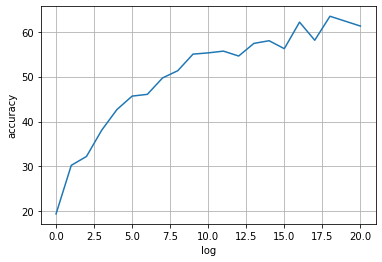

Epoch [4/4], Iter [100/781] Loss: 0.9570, iter_time: 14.01
Test Accuracy of the model on the 100 test images: 64 %
Epoch [4/4], Iter [200/781] Loss: 1.2421, iter_time: 8.62
Test Accuracy of the model on the 100 test images: 64 %
Epoch [4/4], Iter [300/781] Loss: 0.8148, iter_time: 8.64
Test Accuracy of the model on the 100 test images: 64 %
Epoch [4/4], Iter [400/781] Loss: 0.9471, iter_time: 8.64
Test Accuracy of the model on the 100 test images: 66 %
Epoch [4/4], Iter [500/781] Loss: 1.0603, iter_time: 8.62
Test Accuracy of the model on the 100 test images: 66 %
Epoch [4/4], Iter [600/781] Loss: 0.7810, iter_time: 8.62
Test Accuracy of the model on the 100 test images: 65 %
Epoch [4/4], Iter [700/781] Loss: 0.8083, iter_time: 8.62
Test Accuracy of the model on the 100 test images: 68 %


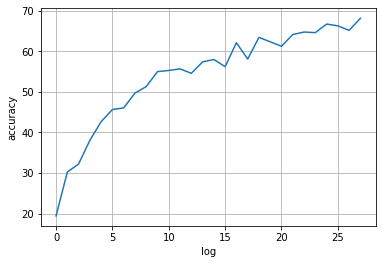

In [18]:
import torchvision.models as models
vgg19 = models.vgg19_bn(pretrained=False)

tell_time = Timer()
iter_time = 0

vgg19 = vgg19.cuda()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(vgg19.parameters(), lr=learning_rate)

accuracy_list = []
for epoch in range(num_epochs):
    vgg19.train()
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images).cuda()
        labels = Variable(labels).cuda()

        # Forward + Backward + Optimize
        optimizer.zero_grad()
        outputs = vgg19(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print ('Epoch [%d/%d], Iter [%d/%d] Loss: %.4f, iter_time: %2.2f' 
                 %(epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss.item(), tell_time.toc()-iter_time))
            iter_time = tell_time.toc()    
            accuracy_list = test_on_cifar10(vgg19, accuracy_list)

    loss_plot(accuracy_list)

Test Accuracy of the model on the test images: 66 %
tensor([[0.8440, 0.0190, 0.0290, 0.0030, 0.0130, 0.0000, 0.0110, 0.0100, 0.0340,
         0.0370],
        [0.0230, 0.8090, 0.0000, 0.0010, 0.0000, 0.0000, 0.0120, 0.0010, 0.0120,
         0.1420],
        [0.1290, 0.0080, 0.3320, 0.0400, 0.2250, 0.0510, 0.1130, 0.0700, 0.0070,
         0.0250],
        [0.0370, 0.0220, 0.0300, 0.2320, 0.1380, 0.1970, 0.1590, 0.1050, 0.0160,
         0.0640],
        [0.0500, 0.0060, 0.0130, 0.0130, 0.7130, 0.0130, 0.0530, 0.1200, 0.0100,
         0.0090],
        [0.0200, 0.0110, 0.0170, 0.1190, 0.0970, 0.4930, 0.0400, 0.1650, 0.0090,
         0.0290],
        [0.0090, 0.0130, 0.0080, 0.0370, 0.0870, 0.0010, 0.8100, 0.0090, 0.0030,
         0.0230],
        [0.0370, 0.0030, 0.0090, 0.0080, 0.0550, 0.0110, 0.0050, 0.8270, 0.0010,
         0.0440],
        [0.1230, 0.0460, 0.0080, 0.0090, 0.0060, 0.0010, 0.0130, 0.0040, 0.7440,
         0.0460],
        [0.0440, 0.0490, 0.0010, 0.0030, 0.0030, 0.0000, 

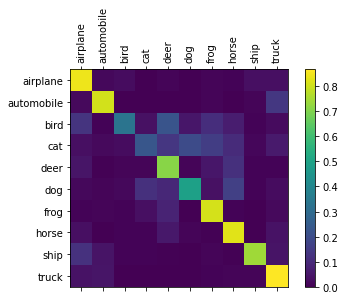

In [19]:
import matplotlib.ticker as ticker
import pickle

# Import class labels from the ASCII file
path = './data/cifar-10-batches-py/batches.meta'
test = open(path, 'rb')
store = pickle.load(test)
label = store['label_names']

# Plot the confusion matrix
n_label = len(label)
confusion = torch.zeros(n_label, n_label)
correct = 0
total = 0
# Plot the confusion matrix of implemented VGG-19
for j, (images, labels) in enumerate(test_loader):
    images = Variable(images).cuda()
    outputs = vgg19(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted.cpu() == labels).sum()
    for i in range(len(images)):
        confusion[labels[i].item()][predicted[i].item()] += 1
for i in range(n_label):
    confusion[i] = confusion[i] / confusion[i].sum()

print('Test Accuracy of the model on the test images: %d %%' % (100 * correct.float() / total))

# Set up plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)

# Set up axes
ax.set_xticks(range(10))
ax.set_xticklabels(label, rotation=90)
ax.set_yticks(range(10))
ax.set_yticklabels(label)

# Force label at every tick
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

plt.savefig('confusionvgg19.png')
# Perform analysis on the confusion matrix for classification on CIFAR-10 using VGG-19
print(confusion)

## Train Cifar-10 with pre-trained VGG-19

In [20]:
import torchvision.models as models
pre_vgg=models.vgg19_bn(pretrained=True)

In [21]:
class pretrained_vgg(nn.Module):
    def __init__(self, pre_vgg):
        super(pretrained_vgg, self).__init__()
        self.features = nn.Sequential(   
            *list(pre_vgg.features.children())
        )
        self.linear = nn.Sequential(
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.Linear(128, 10),
        )
    def forward(self, x):
        out = self.features(x).squeeze()
        out = self.linear(out)
        return out

Epoch [1/4], Iter [100/781] Loss: 1.2552, iter_time: 3.03
Test Accuracy of the model on the 100 test images: 63 %
Epoch [1/4], Iter [200/781] Loss: 0.6910, iter_time: 4.26
Test Accuracy of the model on the 100 test images: 73 %
Epoch [1/4], Iter [300/781] Loss: 0.6188, iter_time: 4.28
Test Accuracy of the model on the 100 test images: 78 %
Epoch [1/4], Iter [400/781] Loss: 0.7110, iter_time: 4.27
Test Accuracy of the model on the 100 test images: 79 %
Epoch [1/4], Iter [500/781] Loss: 0.5619, iter_time: 4.26
Test Accuracy of the model on the 100 test images: 80 %
Epoch [1/4], Iter [600/781] Loss: 0.5218, iter_time: 4.26
Test Accuracy of the model on the 100 test images: 81 %
Epoch [1/4], Iter [700/781] Loss: 0.3190, iter_time: 4.27
Test Accuracy of the model on the 100 test images: 83 %


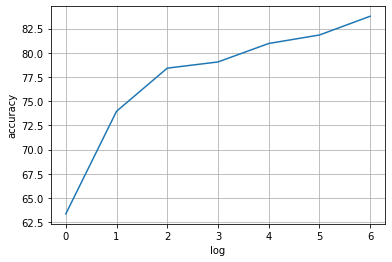

Epoch [2/4], Iter [100/781] Loss: 0.3391, iter_time: 6.73
Test Accuracy of the model on the 100 test images: 85 %
Epoch [2/4], Iter [200/781] Loss: 0.5118, iter_time: 4.27
Test Accuracy of the model on the 100 test images: 82 %
Epoch [2/4], Iter [300/781] Loss: 0.2493, iter_time: 4.26
Test Accuracy of the model on the 100 test images: 85 %
Epoch [2/4], Iter [400/781] Loss: 0.4485, iter_time: 4.27
Test Accuracy of the model on the 100 test images: 83 %
Epoch [2/4], Iter [500/781] Loss: 0.3317, iter_time: 4.27
Test Accuracy of the model on the 100 test images: 85 %
Epoch [2/4], Iter [600/781] Loss: 0.3511, iter_time: 4.27
Test Accuracy of the model on the 100 test images: 84 %
Epoch [2/4], Iter [700/781] Loss: 0.3351, iter_time: 4.27
Test Accuracy of the model on the 100 test images: 85 %


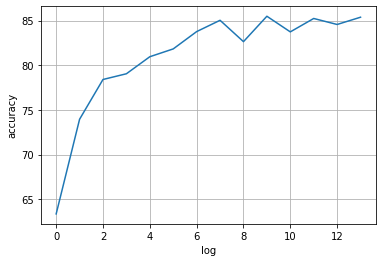

Epoch [3/4], Iter [100/781] Loss: 0.3183, iter_time: 6.72
Test Accuracy of the model on the 100 test images: 87 %
Epoch [3/4], Iter [200/781] Loss: 0.2992, iter_time: 4.28
Test Accuracy of the model on the 100 test images: 85 %
Epoch [3/4], Iter [300/781] Loss: 0.3651, iter_time: 4.27
Test Accuracy of the model on the 100 test images: 85 %
Epoch [3/4], Iter [400/781] Loss: 0.1680, iter_time: 4.27
Test Accuracy of the model on the 100 test images: 86 %
Epoch [3/4], Iter [500/781] Loss: 0.5088, iter_time: 4.27
Test Accuracy of the model on the 100 test images: 86 %
Epoch [3/4], Iter [600/781] Loss: 0.2419, iter_time: 4.29
Test Accuracy of the model on the 100 test images: 87 %
Epoch [3/4], Iter [700/781] Loss: 0.4598, iter_time: 4.28
Test Accuracy of the model on the 100 test images: 87 %


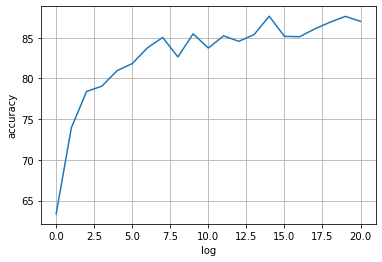

Epoch [4/4], Iter [100/781] Loss: 0.1549, iter_time: 6.73
Test Accuracy of the model on the 100 test images: 88 %
Epoch [4/4], Iter [200/781] Loss: 0.4256, iter_time: 4.27
Test Accuracy of the model on the 100 test images: 87 %
Epoch [4/4], Iter [300/781] Loss: 0.0858, iter_time: 4.27
Test Accuracy of the model on the 100 test images: 86 %
Epoch [4/4], Iter [400/781] Loss: 0.2111, iter_time: 4.27
Test Accuracy of the model on the 100 test images: 88 %
Epoch [4/4], Iter [500/781] Loss: 0.2606, iter_time: 4.28
Test Accuracy of the model on the 100 test images: 86 %
Epoch [4/4], Iter [600/781] Loss: 0.1871, iter_time: 4.28
Test Accuracy of the model on the 100 test images: 86 %
Epoch [4/4], Iter [700/781] Loss: 0.2205, iter_time: 4.28
Test Accuracy of the model on the 100 test images: 86 %


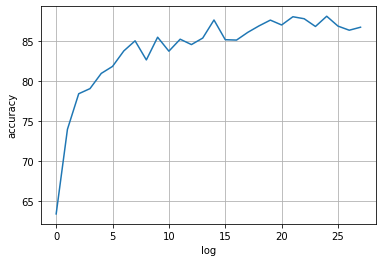

In [22]:
vgg19 = pretrained_vgg(pre_vgg)

tell_time = Timer()
iter_time = 0

vgg19 = vgg19.cuda()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(vgg19.parameters(), lr=learning_rate)

accuracy_list = []
for epoch in range(num_epochs):
    vgg19.train()
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images).cuda()
        labels = Variable(labels).cuda()

        # Forward + Backward + Optimize
        optimizer.zero_grad()
        outputs = vgg19(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print ('Epoch [%d/%d], Iter [%d/%d] Loss: %.4f, iter_time: %2.2f' 
                 %(epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss.item(), tell_time.toc()-iter_time))
            iter_time = tell_time.toc()    
            accuracy_list = test_on_cifar10(vgg19, accuracy_list)

    loss_plot(accuracy_list)

Test Accuracy of the model on the test images: 87 %
tensor([[0.8910, 0.0020, 0.0190, 0.0070, 0.0120, 0.0050, 0.0030, 0.0030, 0.0510,
         0.0070],
        [0.0090, 0.9000, 0.0030, 0.0030, 0.0010, 0.0000, 0.0030, 0.0000, 0.0360,
         0.0450],
        [0.0190, 0.0010, 0.8170, 0.0260, 0.0360, 0.0370, 0.0510, 0.0110, 0.0020,
         0.0000],
        [0.0060, 0.0010, 0.0190, 0.6520, 0.0310, 0.2190, 0.0520, 0.0100, 0.0080,
         0.0020],
        [0.0040, 0.0010, 0.0300, 0.0110, 0.8930, 0.0260, 0.0170, 0.0140, 0.0030,
         0.0010],
        [0.0020, 0.0000, 0.0060, 0.0690, 0.0210, 0.8770, 0.0120, 0.0100, 0.0020,
         0.0010],
        [0.0030, 0.0000, 0.0060, 0.0160, 0.0100, 0.0110, 0.9460, 0.0010, 0.0050,
         0.0020],
        [0.0050, 0.0000, 0.0080, 0.0080, 0.0230, 0.0670, 0.0020, 0.8840, 0.0030,
         0.0000],
        [0.0210, 0.0010, 0.0000, 0.0040, 0.0020, 0.0000, 0.0020, 0.0000, 0.9630,
         0.0070],
        [0.0180, 0.0240, 0.0010, 0.0010, 0.0020, 0.0000, 

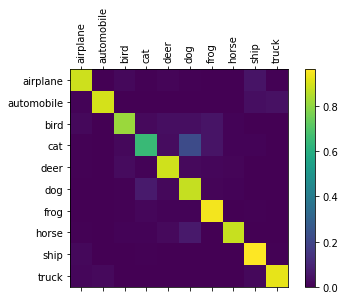

In [23]:
n_label = len(label)
confusion = torch.zeros(n_label, n_label)
correct = 0
total = 0
# Plot the confusion matrix of pre-trained VGG-19
for j, (images, labels) in enumerate(test_loader):
    images = Variable(images).cuda()
    outputs = vgg19(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted.cpu() == labels).sum()
    for i in range(len(images)):
        confusion[labels[i].item()][predicted[i].item()] += 1
for i in range(n_label):
    confusion[i] = confusion[i] / confusion[i].sum()

print('Test Accuracy of the model on the test images: %d %%' % (100 * correct.float() / total))

# Set up plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)

# Set up axes
ax.set_xticks(range(10))
ax.set_xticklabels(label, rotation=90)
ax.set_yticks(range(10))
ax.set_yticklabels(label)

# Force label at every tick
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

plt.savefig('confusionpretrainedvgg19.png')

# Perform analysis on the confusion matrix for classification on CIFAR-10 using pretrained VGG-19
print(confusion) 